You are given an integer matrix isWater of size m x n that represents a map of land and water cells.

    If isWater[i][j] == 0, cell (i, j) is a land cell.
    If isWater[i][j] == 1, cell (i, j) is a water cell.

You must assign each cell a height in a way that follows these rules:

    The height of each cell must be non-negative.
    If the cell is a water cell, its height must be 0.
    Any two adjacent cells must have an absolute height difference of at most 1. A cell is adjacent to another cell if the former is directly north, east, south, or west of the latter (i.e., their sides are touching).

Find an assignment of heights such that the maximum height in the matrix is maximized.

Return an integer matrix height of size m x n where height[i][j] is cell (i, j)'s height. If there are multiple solutions, return any of them.

 

Example 1:

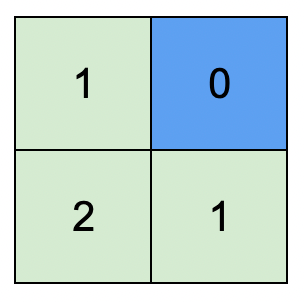

Input: isWater = [[0,1],[0,0]]
Output: [[1,0],[2,1]]
Explanation: The image shows the assigned heights of each cell.
The blue cell is the water cell, and the green cells are the land cells.

Example 2:

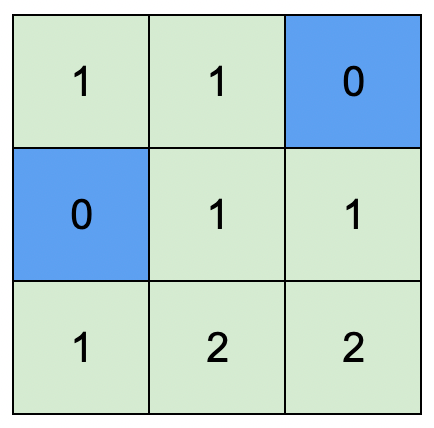

Input: isWater = [[0,0,1],[1,0,0],[0,0,0]]
Output: [[1,1,0],[0,1,1],[1,2,2]]
Explanation: A height of 2 is the maximum possible height of any assignment.
Any height assignment that has a maximum height of 2 while still meeting the rules will also be accepted.

 

Constraints:

    m == isWater.length
    n == isWater[i].length
    1 <= m, n <= 1000
    isWater[i][j] is 0 or 1.
    There is at least one water cell.

 

Note: This question is the same as 542: https://leetcode.com/problems/01-matrix/


In [ ]:
class Solution:
    def highestPeak(self, isWater: List[List[int]]) -> List[List[int]]:
        m = len(isWater)
        n = len(isWater[0])
        ans = [[-1 for _ in range(n)] for _ in range(m)]
        q = deque()
        for i in range(m):
            for j in range(n):
                if isWater[i][j]:
                    q.append((i, j, 0))
        while q:
            k = len(q)
            for _ in range(k):
                i, j, height = q.popleft()
                if ans[i][j] != -1:
                    continue
                ans[i][j] = height
                for di, dj in [(0, -1), (0, 1), (-1, 0), (1, 0)]:
                    if 0 <= i + di < m and 0 <= j + dj < n and ans[i + di][j + dj] == -1:
                        q.append((i + di, j + dj, height + 1))
        return ans